In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
from nereus.datasets.itp import *
from nereus.datasets.udash import *
from nereus.datasets.argo import *

In [3]:
itp = xr.open_dataset("../data/itp/cache/itp1grd0001.dat.nc")

In [4]:
itp.load()

<xarray.Dataset>
Dimensions:         (ndepths: 751)
Coordinates:
    longitude       float64 -150.1
    latitude        float64 78.83
    time            datetime64[ns] 2005-08-16T06:00:00.864000
Dimensions without coordinates: ndepths
Data variables:
    pressure(dbar)  (ndepths) float64 9.7 11.0 12.0 13.0 ... 758.0 759.1 760.1
    temperature(C)  (ndepths) float64 -1.464 -1.461 -1.454 ... 0.2405 0.2406
    salinity        (ndepths) float64 28.96 28.97 29.0 ... 34.87 34.87 34.87
    nobs            (ndepths) int32 34 4 4 4 4 5 4 4 4 4 ... 3 4 4 3 4 4 5 6 26
Attributes:
    source:     ITP
    ITP:        1
    profile:    1
    year:       2005
    day:        228.25001
    longitude:  -150.1313
    latitude:   78.8267
    ndepths:    751

In [52]:
itp_fps = xr.Dataset.from_dataframe(load_itp()[0])
load_itp()[1]

,file,source,ITP,profile,year,day,longitude(E+),latitude(N+),ndepths,time
0,itp92grd1771.dat,ITP,92,1771,2016,45.87663,-175.2627,83.4685,756,2016-02-14T21:02:20.832000
1,itp3grd0876.dat,ITP,3,876,2006,90.00002,-137.0085,75.9560,752,2006-03-31T00:00:01.728000
2,itp105grd1056.dat,ITP,105,1056,2018,336.55359,-137.8041,80.1220,1,2018-12-02T13:17:10.176000
3,itp105grd2695.dat,ITP,105,2695,2019,62.55373,-130.5329,81.4875,1,2019-03-03T13:17:22.272000
4,itp105grd2178.dat,ITP,105,2178,2019,33.81409,-135.2775,80.5702,1,2019-02-02T19:32:17.376000
...,...,...,...,...,...,...,...,...,...,...
112633,itp41grd0035.dat,ITP,41,35,2010,293.00007,-151.0848,78.9045,754,2010-10-20T00:00:06.048000
112634,itp105grd4798.dat,ITP,105,4798,2019,175.00141,-128.9254,80.9999,246,2019-06-24T00:02:01.824000
112635,itp1grd1398.dat,ITP,1,1398,2006,212.50003,-133.9630,77.2679,753,2006-07-31T12:00:02.592000
112636,itp3grd0393.dat,ITP,3,393,2005,334.25003,-133.8556,76.4559,753,2005-11-30T06:00:02.592000


In [51]:
itp_fps

<xarray.Dataset>
Dimensions:                    (index: 53434355)
Coordinates:
  * index                      (index) int64 0 1 2 ... 53434353 53434354
Data variables: (12/18)
    pressure(dbar)             (index) float64 6.3 6.8 8.0 ... 758.1 759.1 760.0
    temperature(C)             (index) float64 -1.63 -1.631 ... 0.2992 0.2967
    salinity                   (index) float64 29.78 29.78 29.78 ... 34.86 34.86
    nobs                       (index) int64 8 4 4 4 3 4 4 3 ... 5 5 5 6 5 5 5 5
    file                       (index) object 'itp92grd1771.dat' ... 'itp122g...
    east(cm/s)                 (index) float64 nan nan nan nan ... nan nan nan
    ...                         ...
    turbidity(/m/sr)x10^4      (index) float64 nan nan nan nan ... nan nan nan
    chlorophyll-a(ug/l)        (index) float64 nan nan nan nan ... nan nan nan
    dissolved_oxygen(umol/kg)  (index) float64 nan nan nan nan ... nan nan nan
    turbidity(e-4)             (index) float64 nan nan nan nan ... nan nan nan
    chlorophyll_a(ug/l)        (index) float64 nan nan nan nan ... nan nan nan
    nbio                       (index) float64 nan nan nan nan ... nan nan nan

In [5]:
u = xr.Dataset.from_dataframe(load_udash())
u

/var/folders/9k/nwgb9qsj1r5b2qgsc24mdvqc0000gn/T/ipykernel_31251/938890814.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  u = xr.Dataset.from_dataframe(load_udash())
/var/folders/9k/nwgb9qsj1r5b2qgsc24mdvqc0000gn/T/ipykernel_31251/938890814.py:1: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the Da

<xarray.Dataset>
Dimensions:            (index: 74107077)
Coordinates:
  * index              (index) int64 0 1 2 3 ... 74107074 74107075 74107076
Data variables: (12/19)
    Prof_no            (index) int64 11752 11752 11752 ... 286502 286502 286502
    Cruise             (index) object 'ARANDA' ... 'Polarstern_ARK-XVI_2'
    Station            (index) object '0013' '0013' '0013' ... '280-1' '280-1'
    Platform           (index) object 'S' 'S' 'S' 'S' 'S' ... 'S' 'S' 'S' 'S'
    Type               (index) object 'B' 'B' 'B' 'B' ... 'CTD' 'CTD' 'CTD'
    yyyy-mm-ddThh:mm   (index) datetime64[ns] 2008-01-12T15:02:00 ... 2000-08...
    ...                 ...
    Salinity_[psu]     (index) float64 2.888 2.888 2.888 ... 34.91 34.91 34.91
    QF_Salinity_[psu]  (index) int64 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
    Source             (index) object 'ices' 'ices' 'ices' ... 'pan' 'pan' 'pan'
    DOI                (index) object '-999' ... 'doi:10.1594/PANGAEA.742658'
    WOD-Cruise-ID      (index) object '-999' '-999' '-999' ... '-999' '-999'
    WOD-Cast-ID        (index) object '-999' '-999' '-999' ... '-999' '-999'

In [6]:
ds = xr.open_dataset("../data/argo/GL_PR_PF_49064.nc").load()

ds1 = xr.open_dataset("../data/argo/GL_PR_PF_49067.nc").load()

In [7]:
ds

<xarray.Dataset>
Dimensions:                   (TIME: 20, LATITUDE: 20, LONGITUDE: 20,
                               POSITION: 20, DEPTH: 71)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2002-11-11T21:58:15 ... 2...
  * LATITUDE                  (LATITUDE) float32 60.87 60.87 ... 61.66 61.96
  * LONGITUDE                 (LONGITUDE) float32 -50.43 -53.66 ... -55.84
Dimensions without coordinates: POSITION, DEPTH
Data variables:
    TIME_QC                   (TIME) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    POSITION_QC               (POSITION) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    DC_REFERENCE              (TIME) object b'1500050' b'1500051' ... b'1500073'
    DIRECTION                 (TIME) object b'A' b'A' b'A' ... b'A' b'A' b'A'
    VERTICAL_SAMPLING_SCHEME  (TIME) object b'Primary sampling: discrete' ......
    PRES                      (TIME, DEPTH) float32 9.7 19.4 ... 1.999e+03
    PRES_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    TEMP                      (TIME, DEPTH) float64 3.465 3.528 ... 3.041 2.986
    TEMP_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    PSAL                      (TIME, DEPTH) float64 33.8 33.82 ... 34.89 34.89
    PSAL_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  49064
    institution:                    Met Office Exeter
    institution_edmo_code:          29
    site_code:                       
    ...                             ...
    last_date_observation:          2003-06-29T22:16:20Z
    last_latitude_observation:      61.95500
    last_longitude_observation:     -55.83700
    date_update:                    2024-01-17T20:15:46Z
    history:                        2024-01-17T20:15:46Z : Creation
    data_mode:                      R

In [8]:
ds1

<xarray.Dataset>
Dimensions:                   (TIME: 14, LATITUDE: 14, LONGITUDE: 14,
                               POSITION: 14, DEPTH: 71)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2002-04-15T22:31:48 ... 2...
  * LATITUDE                  (LATITUDE) float32 60.27 60.76 ... 60.45 60.38
  * LONGITUDE                 (LONGITUDE) float32 -48.58 -49.39 ... -56.4 -56.47
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/17)
    TIME_QC                   (TIME) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    POSITION_QC               (POSITION) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0
    DC_REFERENCE              (TIME) object b'1500217' b'1500218' ... b'1500234'
    DIRECTION                 (TIME) object b'A' b'A' b'A' ... b'A' b'A' b'A'
    VERTICAL_SAMPLING_SCHEME  (TIME) object b'Primary sampling: discrete' ......
    PRES                      (TIME, DEPTH) float32 9.7 19.6 ... 1.949e+03 2e+03
    ...                        ...
    TEMP_ADJUSTED             (TIME, DEPTH) float64 0.324 0.342 ... nan nan
    TEMP_ADJUSTED_QC          (TIME, DEPTH) float32 1.0 1.0 1.0 ... nan nan nan
    PSAL                      (TIME, DEPTH) float64 33.8 33.81 ... 34.88 34.88
    PSAL_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    PSAL_ADJUSTED             (TIME, DEPTH) float64 33.8 33.81 33.82 ... nan nan
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 1.0 1.0 1.0 ... nan nan nan
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  49067
    institution:                    Met Office Exeter
    institution_edmo_code:          29
    site_code:                       
    ...                             ...
    last_date_observation:          2002-10-02T22:16:31Z
    last_latitude_observation:      60.37600
    last_longitude_observation:     -56.46600
    date_update:                    2024-01-17T18:57:29Z
    history:                        2024-01-17T18:57:29Z : Creation
    data_mode:                      M

In [9]:
ds_drop = ds.drop_dims("POSITION")
ds_drop

<xarray.Dataset>
Dimensions:                   (TIME: 20, LATITUDE: 20, LONGITUDE: 20, DEPTH: 71)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2002-11-11T21:58:15 ... 2...
  * LATITUDE                  (LATITUDE) float32 60.87 60.87 ... 61.66 61.96
  * LONGITUDE                 (LONGITUDE) float32 -50.43 -53.66 ... -55.84
Dimensions without coordinates: DEPTH
Data variables:
    TIME_QC                   (TIME) float32 1.0 1.0 1.0 1.0 ... 1.0 1.0 1.0 1.0
    DC_REFERENCE              (TIME) object b'1500050' b'1500051' ... b'1500073'
    DIRECTION                 (TIME) object b'A' b'A' b'A' ... b'A' b'A' b'A'
    VERTICAL_SAMPLING_SCHEME  (TIME) object b'Primary sampling: discrete' ......
    PRES                      (TIME, DEPTH) float32 9.7 19.4 ... 1.999e+03
    PRES_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    TEMP                      (TIME, DEPTH) float64 3.465 3.528 ... 3.041 2.986
    TEMP_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
    PSAL                      (TIME, DEPTH) float64 33.8 33.82 ... 34.89 34.89
    PSAL_QC                   (TIME, DEPTH) float32 1.0 1.0 1.0 ... 1.0 1.0 1.0
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  49064
    institution:                    Met Office Exeter
    institution_edmo_code:          29
    site_code:                       
    ...                             ...
    last_date_observation:          2003-06-29T22:16:20Z
    last_latitude_observation:      61.95500
    last_longitude_observation:     -55.83700
    date_update:                    2024-01-17T20:15:46Z
    history:                        2024-01-17T20:15:46Z : Creation
    data_mode:                      R

In [47]:
def preprocess(ds: xr.Dataset):
	ds = ds.assign_coords(LONGITUDE=("TIME", ds["LONGITUDE"].data), LATITUDE=("TIME", ds["LATITUDE"].data))
	ds = ds.assign_coords(DEPTH=("DEPTH", range(ds.sizes[("DEPTH")])))
	return ds.drop_dims("POSITION")

d = xr.open_mfdataset(["../data/argo/GL_PR_PF_49064.nc", "../data/argo/GL_PR_PF_49067.nc"], preprocess=preprocess, combine="nested", concat_dim="PROFILE")

d

<xarray.Dataset>
Dimensions:                   (TIME: 34, DEPTH: 71, PROFILE: 2)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2002-04-15T22:31:48 ... 2...
  * DEPTH                     (DEPTH) int64 0 1 2 3 4 5 6 ... 65 66 67 68 69 70
    LONGITUDE                 (TIME) float32 -48.58 -49.39 ... -56.66 -55.84
    LATITUDE                  (TIME) float32 60.27 60.76 61.23 ... 61.66 61.96
Dimensions without coordinates: PROFILE
Data variables: (12/16)
    TIME_QC                   (PROFILE, TIME) float32 dask.array<chunksize=(1, 34), meta=np.ndarray>
    DC_REFERENCE              (PROFILE, TIME) object dask.array<chunksize=(1, 34), meta=np.ndarray>
    DIRECTION                 (PROFILE, TIME) object dask.array<chunksize=(1, 34), meta=np.ndarray>
    VERTICAL_SAMPLING_SCHEME  (PROFILE, TIME) object dask.array<chunksize=(1, 34), meta=np.ndarray>
    PRES                      (PROFILE, TIME, DEPTH) float32 dask.array<chunksize=(1, 34, 71), meta=np.ndarray>
    PRES_QC                   (PROFILE, TIME, DEPTH) float32 dask.array<chunksize=(1, 34, 71), meta=np.ndarray>
    ...                        ...
    PRES_ADJUSTED             (PROFILE, TIME, DEPTH) float32 dask.array<chunksize=(2, 34, 71), meta=np.ndarray>
    PRES_ADJUSTED_QC          (PROFILE, TIME, DEPTH) float32 dask.array<chunksize=(2, 34, 71), meta=np.ndarray>
    TEMP_ADJUSTED             (PROFILE, TIME, DEPTH) float64 dask.array<chunksize=(2, 34, 71), meta=np.ndarray>
    TEMP_ADJUSTED_QC          (PROFILE, TIME, DEPTH) float32 dask.array<chunksize=(2, 34, 71), meta=np.ndarray>
    PSAL_ADJUSTED             (PROFILE, TIME, DEPTH) float64 dask.array<chunksize=(2, 34, 71), meta=np.ndarray>
    PSAL_ADJUSTED_QC          (PROFILE, TIME, DEPTH) float32 dask.array<chunksize=(2, 34, 71), meta=np.ndarray>
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  49064
    institution:                    Met Office Exeter
    institution_edmo_code:          29
    site_code:                       
    ...                             ...
    last_date_observation:          2003-06-29T22:16:20Z
    last_latitude_observation:      61.95500
    last_longitude_observation:     -55.83700
    date_update:                    2024-01-17T20:15:46Z
    history:                        2024-01-17T20:15:46Z : Creation
    data_mode:                      R

In [21]:
from pathlib import Path

fps = list(Path("../data/argo/").glob("*.nc"))

In [22]:
len(fps)

675

In [53]:
d = xr.open_mfdataset(
	fps[:4], engine="h5netcdf", parallel=True, preprocess=preprocess, combine="nested", concat_dim="PROFILE")

d

ValueError: cannot reindex or align along dimension 'TIME' because the (pandas) index has duplicate values

In [45]:
d_works = preprocess(xr.open_dataset(
	fps[1]
))
d_works

<xarray.Dataset>
Dimensions:                   (TIME: 458, DEPTH: 1000)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2014-07-29T14:45:32.00000...
    LONGITUDE                 (TIME) float32 1.402 1.402 1.495 ... -1.575 -1.575
    LATITUDE                  (TIME) float32 72.56 72.56 72.66 ... 70.34 70.34
  * DEPTH                     (DEPTH) int64 0 1 2 3 4 5 ... 995 996 997 998 999
Data variables: (12/27)
    TIME_QC                   (TIME) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    PRES_QC                   (TIME, DEPTH) float32 ...
    ...                        ...
    BBP700                    (TIME, DEPTH) float64 ...
    BBP700_QC                 (TIME, DEPTH) float32 ...
    BBP700_ADJUSTED           (TIME, DEPTH) float64 ...
    BBP700_ADJUSTED_QC        (TIME, DEPTH) float32 ...
    CPHL_ADJUSTED             (TIME, DEPTH) float64 ...
    CPHL_ADJUSTED_QC          (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  6902549
    institution:                    Institute of Marine Research
    institution_edmo_code:          1351
    site_code:                       
    ...                             ...
    last_date_observation:          2018-02-07T23:14:35Z
    last_latitude_observation:      70.34100
    last_longitude_observation:     -1.57500
    date_update:                    2024-01-17T18:53:50Z
    history:                        2024-01-17T18:53:50Z : Creation
    data_mode:                      M

In [44]:
d_doesnt = preprocess(xr.open_dataset(
	fps[2]
))
d_doesnt

<xarray.Dataset>
Dimensions:                   (TIME: 17, DEPTH: 71)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2012-05-18T21:58:00 ... 2...
    LONGITUDE                 (TIME) float32 -54.14 -53.27 ... -54.42 -56.45
    LATITUDE                  (TIME) float32 60.71 60.47 61.23 ... 60.29 60.99
  * DEPTH                     (DEPTH) int64 0 1 2 3 4 5 6 ... 65 66 67 68 69 70
Data variables: (12/16)
    TIME_QC                   (TIME) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    PRES_QC                   (TIME, DEPTH) float32 ...
    ...                        ...
    TEMP_ADJUSTED             (TIME, DEPTH) float64 ...
    TEMP_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PSAL                      (TIME, DEPTH) float64 ...
    PSAL_QC                   (TIME, DEPTH) float32 ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  4901172
    institution:                    Fisheries and Oceans Canada Marine Enviro...
    institution_edmo_code:          1979
    site_code:                       
    ...                             ...
    last_date_observation:          2012-10-25T22:00:00Z
    last_latitude_observation:      60.98800
    last_longitude_observation:     -56.44700
    date_update:                    2024-01-17T20:47:26Z
    history:                        2024-01-17T20:47:26Z : Creation
    data_mode:                      M

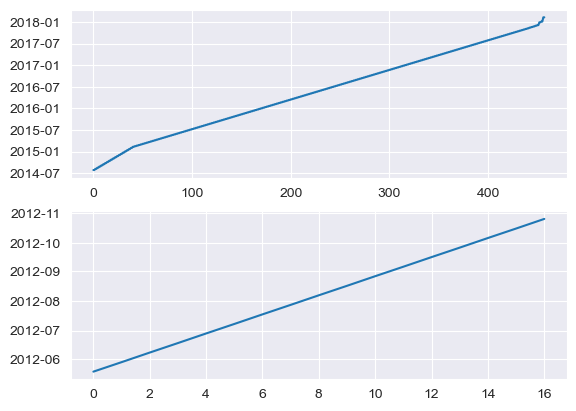

In [46]:
f, ax = plt.subplots(nrows=2)
ax[0].plot(d_works.TIME.values)
ax[1].plot(d_doesnt.TIME.values)


In [43]:
xr.open_mfdataset(
	fps[1:3]
)

ValueError: cannot reindex or align along dimension 'POSITION' because of conflicting dimension sizes: {17, 458}

In [16]:
xr.open_dataset(
	"../data/argo/GL_PR_PF_49067.nc"
)

<xarray.Dataset>
Dimensions:                   (TIME: 14, LATITUDE: 14, LONGITUDE: 14,
                               POSITION: 14, DEPTH: 71)
Coordinates:
  * TIME                      (TIME) datetime64[ns] 2002-04-15T22:31:48 ... 2...
  * LATITUDE                  (LATITUDE) float32 60.27 60.76 ... 60.45 60.38
  * LONGITUDE                 (LONGITUDE) float32 -48.58 -49.39 ... -56.4 -56.47
Dimensions without coordinates: POSITION, DEPTH
Data variables: (12/17)
    TIME_QC                   (TIME) float32 ...
    POSITION_QC               (POSITION) float32 ...
    DC_REFERENCE              (TIME) object ...
    DIRECTION                 (TIME) object ...
    VERTICAL_SAMPLING_SCHEME  (TIME) object ...
    PRES                      (TIME, DEPTH) float32 ...
    ...                        ...
    TEMP_ADJUSTED             (TIME, DEPTH) float64 ...
    TEMP_ADJUSTED_QC          (TIME, DEPTH) float32 ...
    PSAL                      (TIME, DEPTH) float64 ...
    PSAL_QC                   (TIME, DEPTH) float32 ...
    PSAL_ADJUSTED             (TIME, DEPTH) float64 ...
    PSAL_ADJUSTED_QC          (TIME, DEPTH) float32 ...
Attributes: (12/49)
    data_type:                      OceanSITES vertical profile
    format_version:                 1.4
    platform_code:                  49067
    institution:                    Met Office Exeter
    institution_edmo_code:          29
    site_code:                       
    ...                             ...
    last_date_observation:          2002-10-02T22:16:31Z
    last_latitude_observation:      60.37600
    last_longitude_observation:     -56.46600
    date_update:                    2024-01-17T18:57:29Z
    history:                        2024-01-17T18:57:29Z : Creation
    data_mode:                      M